In [1]:
import torch.cuda
!nvidia-smi

Sun Apr 28 22:12:59 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.76                 Driver Version: 551.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080      WDDM  |   00000000:0A:00.0  On |                  N/A |
| 53%   51C    P5             44W /  340W |     962MiB /  10240MiB |     29%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Install YOLOv8

In [2]:
from ultralytics import YOLO
import ultralytics
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
ultralytics.utils.checks.cuda_device_count()
ultralytics.utils.checks.cuda_is_available()

True

#Train YOLOv8 Model on Custom Dataset

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="SmbvOaV5LaeCttD2QED0")
project = rf.workspace("osobjectdetectionproject").project("os_project")
version = project.version(6)
dataset = version.download("yolov8")
print(dataset.location)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.4, to fix: `pip install ultralytics==8.0.196`
C:\Users\Joshua\Desktop\OS Object Detection\os_project-6


In [11]:
model = YOLO('yolov8n.pt')
results = model.train(data=f"{dataset.location}/data.yaml", epochs=500, imgsz=640, patience=25, save=True, save_period=25, device="0", dropout=0.5, project=r"C:\Users\Joshua\Desktop\OS Object Detection\weights"),

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000028E086B0790>
Traceback (most recent call last):
  File "C:\Users\Joshua\anaconda3\envs\torchtest\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "C:\Users\Joshua\anaconda3\envs\torchtest\lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


Ultralytics YOLOv8.2.4  Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Joshua\Desktop\OS Object Detection\os_project-6/data.yaml, epochs=500, time=None, patience=25, batch=16, imgsz=640, save=True, save_period=25, cache=False, device=0, workers=8, project=C:\Users\Joshua\Desktop\OS Object Detection\weights, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\Joshua\Desktop\OS Object Detection\os_project-6\train\labels.cache... 807 images, 0 backgrounds, 0 corrupt: 100%|██████████| 807/807 [00:00<?, ?it/s]
val: Scanning C:\Users\Joshua\Desktop\OS Object Detection\os_project-6\valid\labels... 235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<00:00, 677.08it/s]


val: New cache created: C:\Users\Joshua\Desktop\OS Object Detection\os_project-6\valid\labels.cache
Plotting labels to C:\Users\Joshua\Desktop\OS Object Detection\weights\train18\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\Joshua\Desktop\OS Object Detection\weights\train18
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      2.12G     0.9605      3.368      1.334         20        640: 100%|██████████| 51/51 [00:06<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.94it/s]

                   all        235        318      0.539      0.146      0.216      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      2.26G     0.9682      2.542       1.29         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        235        318      0.317      0.466      0.367      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      2.12G     0.9776      2.312      1.303         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]

                   all        235        318       0.32      0.642       0.37      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      2.21G     0.9862      2.211       1.29         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]


                   all        235        318      0.368      0.487      0.414      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      2.35G     0.9639      2.022      1.271         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        235        318      0.345      0.475      0.417      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      2.22G     0.9541      1.889      1.273         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]


                   all        235        318      0.394      0.566      0.471      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      2.22G     0.9327      1.814      1.252         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]


                   all        235        318      0.465      0.577      0.571      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      2.21G     0.9362       1.68      1.237         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        235        318      0.595      0.541      0.618      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      2.22G     0.9123       1.59      1.229         10        640: 100%|██████████| 51/51 [00:04<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        235        318      0.536      0.592      0.594      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      2.33G     0.9088      1.503      1.229         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]

                   all        235        318      0.578      0.505      0.557      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      2.32G     0.8731      1.474      1.207          9        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.06it/s]


                   all        235        318      0.674       0.64      0.741      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      2.21G      0.874      1.409      1.206         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.31it/s]

                   all        235        318      0.656      0.615      0.683      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      2.11G      0.848       1.34      1.188         27        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]

                   all        235        318      0.666      0.615      0.676       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      2.11G     0.8569       1.27      1.173         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.06it/s]


                   all        235        318       0.68      0.691      0.766      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      2.18G     0.8331      1.276      1.169         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]

                   all        235        318      0.723      0.706      0.746      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      2.24G     0.8324       1.19      1.164         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]

                   all        235        318      0.773      0.692      0.782       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      2.22G      0.814      1.157      1.164         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]

                   all        235        318      0.736      0.697      0.782      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      2.32G     0.8088      1.165      1.162         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]


                   all        235        318      0.705      0.676      0.746      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      2.22G     0.8049      1.165      1.157          9        640: 100%|██████████| 51/51 [00:04<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]


                   all        235        318      0.695      0.627      0.699      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      2.32G     0.8227      1.163      1.156         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.33it/s]


                   all        235        318      0.706      0.671      0.761      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      2.22G     0.7968      1.099      1.152         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]


                   all        235        318      0.762      0.735      0.828      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      2.22G      0.784      1.053      1.132         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        235        318       0.82       0.66       0.79      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      2.21G     0.7872      1.071      1.145         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]

                   all        235        318      0.766      0.728      0.795      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      2.21G     0.7955     0.9934       1.14         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        235        318      0.696      0.771      0.788      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      2.22G     0.7795     0.9931      1.135         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]


                   all        235        318      0.843      0.717      0.845      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      2.22G     0.7532      1.015      1.131         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318       0.77        0.8      0.851      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      2.23G     0.7547     0.9778      1.112         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]


                   all        235        318      0.856      0.761      0.848      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      2.21G     0.7542     0.9515      1.111         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.27it/s]


                   all        235        318       0.77      0.723      0.805      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      2.22G      0.742       0.91      1.107         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        235        318       0.74      0.757      0.818      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      2.13G     0.7501     0.9407      1.117         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]


                   all        235        318      0.873       0.73      0.837      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      2.22G     0.7464     0.9076      1.119         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]


                   all        235        318      0.838      0.764       0.85        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      2.21G     0.7646     0.9049      1.126         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        235        318      0.838       0.75      0.833      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      2.22G     0.7469      0.887      1.113         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.66it/s]

                   all        235        318      0.764      0.777       0.84      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      2.23G     0.7508     0.8859      1.116         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        235        318      0.852      0.782      0.872      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      2.22G     0.7264     0.8641      1.106         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        235        318        0.8      0.769      0.856      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      2.21G     0.7151      0.877      1.105         11        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]


                   all        235        318      0.886      0.734      0.848      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      2.22G      0.707     0.8367      1.104         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]

                   all        235        318      0.785      0.758      0.839      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      2.21G     0.6855     0.8146      1.083         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]


                   all        235        318      0.834      0.769      0.843      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      2.22G     0.7197     0.8465      1.104         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]


                   all        235        318      0.813      0.725      0.818      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      2.21G     0.7295     0.8514       1.11         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        235        318      0.854      0.757      0.877      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      2.22G     0.7178     0.8299      1.109         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.62it/s]


                   all        235        318      0.848      0.823      0.888      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      2.21G     0.7012     0.8223       1.08         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.864      0.791      0.876      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      2.21G     0.7043     0.8162       1.08         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]


                   all        235        318       0.86      0.792      0.879      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      2.21G     0.6688     0.7452      1.071         24        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.26it/s]


                   all        235        318       0.87      0.791      0.876       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      2.22G     0.7124     0.8368      1.097         35        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]


                   all        235        318      0.817      0.786      0.835      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      2.32G     0.6829     0.7881      1.087         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        235        318      0.886      0.808      0.884      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      2.22G     0.7174     0.8023      1.079         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318      0.823      0.792      0.844      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      2.21G     0.6738     0.7632      1.089         11        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]

                   all        235        318      0.847      0.778      0.864      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      2.32G     0.6767     0.7504      1.075         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]


                   all        235        318      0.885      0.769      0.866      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      2.22G     0.6907      0.776       1.09         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]


                   all        235        318      0.841      0.793      0.863      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      2.21G     0.6747     0.7501      1.075         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.886      0.798      0.867      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      2.12G     0.7061     0.7805      1.096         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.56it/s]

                   all        235        318      0.874      0.766      0.884      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      2.22G     0.6939     0.7398      1.082         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]


                   all        235        318      0.839      0.805      0.872      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      2.21G     0.6659     0.7277      1.075         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.31it/s]


                   all        235        318      0.891      0.776       0.89      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      2.33G     0.6808     0.7242      1.068         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        235        318      0.874      0.809       0.89      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      2.32G     0.6828     0.7483      1.075         29        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318      0.848      0.867       0.91      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      2.22G     0.6774     0.7091      1.067         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.56it/s]

                   all        235        318      0.879      0.818      0.896      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      2.22G     0.6702     0.7158      1.067         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.58it/s]

                   all        235        318      0.843      0.822      0.876       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      2.22G     0.6519     0.6775      1.055         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]

                   all        235        318      0.861      0.829      0.896      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      2.21G     0.6558     0.6918      1.063         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]


                   all        235        318      0.877      0.804      0.896      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      2.22G     0.6536     0.6881      1.067         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]

                   all        235        318      0.913      0.822      0.904       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      2.32G     0.6498     0.6861       1.06         24        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        235        318       0.87      0.825      0.893      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      2.22G     0.6562      0.673      1.053         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.62it/s]

                   all        235        318      0.864      0.827      0.898      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      2.31G     0.6564     0.6716      1.045         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]

                   all        235        318      0.816      0.827      0.881      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      2.22G      0.654     0.7042      1.063         30        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]

                   all        235        318      0.901      0.818      0.895      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      2.21G      0.642     0.6653      1.051         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.43it/s]


                   all        235        318      0.847      0.831      0.867       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      2.21G     0.6497     0.6917      1.056         48        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]


                   all        235        318      0.872      0.787      0.878      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      2.21G      0.644     0.6496      1.042         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]


                   all        235        318      0.917      0.799      0.891      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      2.32G     0.6599     0.6649      1.063         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        235        318      0.858      0.839      0.888      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      2.22G      0.636     0.6403      1.053         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]


                   all        235        318      0.883      0.792      0.889      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      2.21G     0.6682     0.6802      1.069         31        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]


                   all        235        318      0.902      0.811      0.889      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      2.21G     0.6301     0.6426       1.05         34        640: 100%|██████████| 51/51 [00:04<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]

                   all        235        318      0.903       0.79      0.884       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      2.22G     0.6235     0.6393      1.048         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]

                   all        235        318      0.918      0.803      0.898      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      2.21G     0.6135     0.5939      1.034         33        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.873      0.806      0.874      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      2.21G     0.6338     0.6246      1.037         31        640: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.45it/s]


                   all        235        318      0.905      0.812      0.902      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      2.21G      0.648     0.6365      1.049         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318       0.88      0.811      0.891      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      2.22G     0.6397     0.6384      1.048         25        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]


                   all        235        318      0.884      0.807      0.889      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      2.21G      0.615     0.6031      1.035         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        235        318      0.876      0.785      0.886      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      2.22G     0.6338     0.6422      1.055         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        235        318      0.866      0.792      0.872      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      2.32G     0.6408     0.6504      1.056         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]


                   all        235        318      0.881      0.834      0.886      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      2.22G     0.6136      0.622      1.038         28        640: 100%|██████████| 51/51 [00:04<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]


                   all        235        318      0.935      0.799      0.903      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      2.22G     0.6231     0.6269      1.045         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.14it/s]


                   all        235        318       0.89      0.841      0.903      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      2.13G     0.6233     0.6406       1.05         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.23it/s]


                   all        235        318      0.879      0.822      0.896      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      2.21G     0.6224     0.5976      1.041         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]


                   all        235        318      0.843      0.837      0.887      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      2.23G     0.6185     0.6097      1.042         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        235        318      0.885      0.831        0.9      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      2.33G     0.5925     0.5879      1.023         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]

                   all        235        318      0.853      0.838      0.896      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      2.22G     0.5936     0.5697      1.025         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.56it/s]

                   all        235        318      0.909      0.845      0.916      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      2.21G     0.6084       0.61       1.03         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]

                   all        235        318      0.899      0.856      0.901      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      2.22G     0.5853      0.602      1.036         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]


                   all        235        318      0.905      0.849      0.914      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      2.22G     0.6108        0.6      1.031         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.867      0.839      0.891       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      2.22G     0.5953     0.5961      1.032         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        235        318      0.869      0.824       0.89      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      2.12G     0.6166     0.5899      1.039         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]


                   all        235        318      0.908      0.858      0.913      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      2.32G     0.6276     0.5906      1.043         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]

                   all        235        318      0.918      0.792      0.906      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      2.21G     0.5924     0.5528      1.021         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]


                   all        235        318      0.917      0.829      0.915      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      2.21G     0.6071     0.6058      1.026         27        640: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]


                   all        235        318      0.873      0.809      0.898      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      2.31G     0.6009     0.5829      1.027         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        235        318      0.933      0.828      0.908      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      2.22G     0.6027     0.5877      1.038         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]

                   all        235        318      0.897      0.823      0.908      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      2.21G     0.6095     0.5803      1.039         24        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]


                   all        235        318       0.91      0.789      0.892      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      2.21G     0.6137     0.5752      1.047         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]


                   all        235        318      0.922      0.873      0.927      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      2.21G     0.6103     0.5772      1.029         43        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]

                   all        235        318      0.896      0.835      0.911      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      2.22G     0.5931     0.5782      1.024         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        235        318      0.939      0.828      0.916      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      2.21G     0.5842     0.5511      1.023         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]


                   all        235        318      0.838       0.89      0.909      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      2.22G     0.6007     0.5842      1.031         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.63it/s]


                   all        235        318      0.901      0.806      0.903      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500       2.2G     0.5921     0.5564      1.035         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]

                   all        235        318      0.935      0.848      0.909      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      2.22G     0.5898     0.5328      1.033         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        235        318      0.926       0.83      0.919      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      2.22G     0.5811     0.5355      1.009         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]


                   all        235        318      0.901      0.873      0.916       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      2.39G     0.5929     0.5498      1.008         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        235        318       0.92      0.853      0.917      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      2.21G     0.5903     0.5565      1.027         24        640: 100%|██████████| 51/51 [00:04<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]


                   all        235        318      0.899      0.845      0.908      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      2.22G     0.5797     0.5535      1.022         39        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.909      0.868      0.922      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      2.21G     0.5577     0.5246      1.012         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.27it/s]


                   all        235        318      0.885      0.812      0.903      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      2.33G     0.5812      0.542      1.016         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]


                   all        235        318      0.932      0.848      0.928      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      2.21G     0.5783     0.5368       1.02         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.31it/s]

                   all        235        318      0.921      0.844       0.92      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      2.22G     0.5926     0.5293       1.01         36        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]


                   all        235        318      0.921      0.845      0.919      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      2.21G     0.5725     0.5431      1.013         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]


                   all        235        318      0.927      0.867      0.926      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      2.24G     0.5879     0.5614      1.029         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        235        318      0.902      0.834      0.904      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      2.22G     0.5648     0.5488      1.026         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]


                   all        235        318      0.937      0.875      0.926      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      2.11G     0.5749     0.5284      1.009         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        235        318      0.923      0.837      0.903      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      2.22G     0.5716     0.5124      0.998         25        640: 100%|██████████| 51/51 [00:04<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]

                   all        235        318      0.918      0.821       0.91      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      2.11G     0.5657     0.5334      1.016         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]


                   all        235        318      0.924      0.848      0.908      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      2.28G     0.5491     0.5261     0.9945         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.26it/s]

                   all        235        318      0.918      0.869      0.918      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      2.26G     0.5708     0.5271      1.017         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.58it/s]

                   all        235        318      0.934      0.857       0.93      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      2.12G     0.5592     0.5155      1.006         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]


                   all        235        318      0.883      0.843      0.923      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      2.19G     0.6021     0.5453      1.026         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.39it/s]

                   all        235        318      0.873      0.882      0.905      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      2.11G     0.5716     0.5275      1.008         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]

                   all        235        318      0.928       0.84      0.924       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      2.18G     0.5695     0.5221       1.01         30        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]


                   all        235        318      0.918       0.85      0.925       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      2.12G      0.578     0.5263      1.022         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]


                   all        235        318      0.894      0.878      0.917      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      2.11G     0.5533     0.4903      1.011          9        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]


                   all        235        318      0.942      0.829      0.908      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500       2.2G     0.5714      0.514      1.007         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]


                   all        235        318      0.934      0.876      0.928      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      2.11G     0.5761     0.5091       1.03         29        640: 100%|██████████| 51/51 [00:04<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]

                   all        235        318      0.935      0.814      0.916      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500       2.3G     0.5476     0.4936      1.003         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        235        318      0.935      0.826      0.918      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      2.19G     0.5534     0.5028      0.996         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]


                   all        235        318      0.944      0.861      0.935      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      2.11G     0.5586     0.5372      1.017         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.60it/s]


                   all        235        318      0.925      0.848      0.927      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      2.21G     0.5356     0.4855      1.013         11        640: 100%|██████████| 51/51 [00:04<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]

                   all        235        318      0.899      0.884      0.923      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      2.11G      0.552     0.4995      1.015         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]

                   all        235        318      0.924      0.833      0.908      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      2.22G      0.552     0.4823     0.9906         30        640: 100%|██████████| 51/51 [00:04<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]


                   all        235        318      0.917      0.853      0.928      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      2.11G     0.5495     0.5026     0.9992         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]


                   all        235        318      0.949      0.871      0.939      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      2.11G      0.543     0.5055      0.998         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.32it/s]


                   all        235        318      0.931      0.837      0.924      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      2.22G     0.5702     0.5089      1.006         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.56it/s]


                   all        235        318      0.923      0.859      0.928      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      2.21G     0.5458     0.4895      1.004         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.33it/s]


                   all        235        318      0.906      0.851      0.911      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      2.21G     0.5318     0.4699     0.9886         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]


                   all        235        318      0.884      0.851      0.918      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      2.11G     0.5342     0.4851      1.004         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]


                   all        235        318      0.921      0.848      0.913       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      2.22G     0.5278     0.4729     0.9821         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]


                   all        235        318      0.962      0.826       0.92      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      2.22G     0.5742     0.4951      1.009         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.24it/s]

                   all        235        318      0.944      0.832      0.916      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      2.21G     0.5366     0.4807     0.9982         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.66it/s]

                   all        235        318      0.931      0.845      0.923      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      2.22G     0.5473      0.494      1.005         27        640: 100%|██████████| 51/51 [00:04<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]


                   all        235        318      0.906      0.885      0.928      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      2.22G     0.5375     0.4662     0.9965         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]

                   all        235        318      0.924      0.833      0.919      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      2.21G     0.5435      0.485      1.003         24        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]

                   all        235        318      0.896      0.864      0.917      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      2.21G     0.5438     0.4758      1.006         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]


                   all        235        318       0.91      0.851      0.931      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      2.22G     0.5415     0.4751     0.9984         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]

                   all        235        318      0.882      0.878      0.932      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      2.21G     0.5242     0.4784     0.9942         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]


                   all        235        318      0.939      0.874      0.937      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      2.21G     0.5368     0.4688      1.004         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]

                   all        235        318      0.915       0.87      0.934      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      2.21G     0.5506     0.4984      1.002         44        640: 100%|██████████| 51/51 [00:04<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]

                   all        235        318      0.924      0.832      0.906      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      2.33G     0.5403     0.4681     0.9975         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318      0.925      0.853       0.92      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      2.22G     0.5316     0.4621      1.004         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]

                   all        235        318      0.917      0.882      0.927      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      2.22G     0.5269     0.4809     0.9975         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]

                   all        235        318      0.896      0.876      0.916      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      2.21G     0.5169      0.464      0.995         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.916      0.871      0.921      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      2.22G     0.5241     0.4804      1.002         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.45it/s]


                   all        235        318      0.911      0.858      0.926      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      2.21G     0.5172     0.4501     0.9925         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]


                   all        235        318      0.942       0.87      0.934      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      2.22G      0.533     0.4784      1.002         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]

                   all        235        318      0.957      0.828       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      2.31G     0.4997     0.4519     0.9832         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.917       0.89      0.931      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      2.32G      0.516     0.4739     0.9845         11        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        235        318      0.918      0.891      0.943      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500       2.4G     0.5087     0.4521     0.9773         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]

                   all        235        318      0.923      0.866      0.926       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      2.18G     0.5397     0.4699     0.9946         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]


                   all        235        318      0.918      0.863      0.928      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      2.21G     0.5206     0.4752     0.9936         18        640: 100%|██████████| 51/51 [00:04<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]

                   all        235        318      0.919      0.865      0.928      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      2.22G     0.5224     0.4565     0.9839         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]


                   all        235        318      0.884      0.863      0.916       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      2.22G     0.5055      0.448     0.9828         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.43it/s]


                   all        235        318      0.903        0.9      0.932      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      2.22G     0.5235     0.4672     0.9944         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]


                   all        235        318      0.932      0.862      0.919      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      2.21G      0.524      0.477     0.9883         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]


                   all        235        318      0.915      0.885      0.933      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      2.34G     0.5257       0.46     0.9823         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]

                   all        235        318      0.925      0.848      0.925      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      2.32G     0.5212     0.4381     0.9821         22        640: 100%|██████████| 51/51 [00:04<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]

                   all        235        318      0.913      0.868      0.921      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      2.22G     0.5153     0.4458     0.9908         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.62it/s]

                   all        235        318      0.915      0.859      0.925      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      2.21G     0.5109     0.4414     0.9896         24        640: 100%|██████████| 51/51 [00:04<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.72it/s]

                   all        235        318      0.918      0.859      0.919      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      2.22G     0.5203      0.442     0.9852         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.86it/s]

                   all        235        318      0.911       0.87      0.926      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      2.21G     0.5009     0.4491     0.9956         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.65it/s]

                   all        235        318      0.934      0.875      0.934      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      2.22G     0.5172     0.4593     0.9998         11        640: 100%|██████████| 51/51 [00:04<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]


                   all        235        318       0.95       0.85      0.933      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      2.21G     0.5106     0.4477     0.9856         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]


                   all        235        318       0.96      0.843      0.923      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      2.22G     0.5016     0.4322     0.9853         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]

                   all        235        318      0.934      0.869       0.92      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      2.22G     0.5123     0.4394     0.9871         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]

                   all        235        318      0.942      0.864      0.932      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      2.22G     0.5072     0.4456     0.9859         17        640: 100%|██████████| 51/51 [00:04<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.16it/s]


                   all        235        318       0.91      0.882      0.927      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      2.21G     0.5032     0.4242      0.978         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]


                   all        235        318      0.935      0.879      0.941      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      2.22G      0.489     0.4203     0.9822         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318       0.94      0.863       0.94      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      2.21G     0.4893     0.4395     0.9754         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]

                   all        235        318      0.921      0.881      0.938      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      2.32G     0.5045     0.4221     0.9739         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]

                   all        235        318      0.937      0.865      0.934      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      2.21G     0.4861     0.4304     0.9788         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.65it/s]

                   all        235        318      0.922      0.864      0.922      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      2.13G     0.5157     0.4351     0.9816         14        640: 100%|██████████| 51/51 [00:04<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]

                   all        235        318      0.934      0.863      0.936      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      2.22G     0.5028     0.4355     0.9845         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]

                   all        235        318      0.922      0.872       0.93      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      2.14G     0.4996     0.4338     0.9755         66        640: 100%|██████████| 51/51 [00:04<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]

                   all        235        318      0.917      0.884      0.937      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      2.21G     0.4911     0.4319     0.9811         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]


                   all        235        318      0.934       0.85      0.918      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      2.15G     0.4978     0.4286     0.9869         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]


                   all        235        318      0.944      0.854      0.931      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      2.21G      0.491     0.4265     0.9752         25        640: 100%|██████████| 51/51 [00:04<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]

                   all        235        318      0.912      0.857      0.929      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      2.24G     0.5086     0.4376     0.9826         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]


                   all        235        318      0.914       0.87      0.927       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      2.21G     0.4885     0.4171     0.9673         26        640: 100%|██████████| 51/51 [00:04<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.54it/s]


                   all        235        318      0.947      0.863      0.925      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      2.13G     0.4871     0.4161     0.9684         12        640: 100%|██████████| 51/51 [00:04<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]


                   all        235        318       0.92      0.884      0.932      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      2.21G     0.4822     0.4136     0.9787         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]


                   all        235        318      0.902      0.874      0.922      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      2.21G     0.4875     0.4213     0.9816         31        640: 100%|██████████| 51/51 [00:04<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]


                   all        235        318      0.934      0.835       0.92      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      2.18G     0.4961     0.4258     0.9702         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.38it/s]


                   all        235        318      0.924      0.867       0.93      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      2.22G     0.4983      0.414     0.9752         23        640: 100%|██████████| 51/51 [00:04<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]

                   all        235        318      0.904      0.873      0.922      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      2.12G      0.479     0.4137     0.9758         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]


                   all        235        318      0.896      0.908      0.939      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      2.19G     0.4785     0.4012      0.972         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]


                   all        235        318      0.922      0.875       0.93      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500       2.1G     0.4706     0.3902     0.9625         16        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]

                   all        235        318      0.928      0.871      0.929      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      2.22G     0.4688     0.4059     0.9628         20        640: 100%|██████████| 51/51 [00:04<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]


                   all        235        318       0.89      0.876      0.918      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500       2.3G     0.4842     0.4135     0.9651         15        640: 100%|██████████| 51/51 [00:04<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]


                   all        235        318       0.94      0.837      0.929      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      2.11G     0.4816     0.4153     0.9667         21        640: 100%|██████████| 51/51 [00:04<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]


                   all        235        318      0.942      0.839      0.926      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500       2.1G      0.479     0.3992     0.9761         19        640: 100%|██████████| 51/51 [00:04<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.33it/s]


                   all        235        318      0.921      0.865      0.929      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      2.11G     0.4949     0.4221     0.9702         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.44it/s]

                   all        235        318      0.947      0.864      0.934      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      2.21G     0.4775     0.4122     0.9692         13        640: 100%|██████████| 51/51 [00:04<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]

                   all        235        318      0.944      0.855      0.928       0.81
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 181, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



206 epochs completed in 0.331 hours.
Optimizer stripped from C:\Users\Joshua\Desktop\OS Object Detection\weights\train18\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\Joshua\Desktop\OS Object Detection\weights\train18\weights\best.pt, 6.3MB

Validating C:\Users\Joshua\Desktop\OS Object Detection\weights\train18\weights\best.pt...
Ultralytics YOLOv8.2.4  Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]


                   all        235        318      0.938      0.863       0.94      0.815
             Brad_Pitt        235         47      0.829      0.957      0.962      0.856
               Firearm        235         52      0.904      0.596      0.755      0.518
          Henry_Cavill        235         42      0.936      0.929      0.987      0.944
          Keanu_Reeves        235         30      0.976        0.8      0.955       0.82
           Kim_Chaewon        235         37      0.998          1      0.995      0.853
                 Phone        235         71      0.954       0.93      0.969      0.819
          Ryan_Gosling        235         39       0.97      0.831      0.958      0.896
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\Joshua\Desktop\OS Object Detection\weights\train18


In [65]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.maps   # a list contains map50-95 of each c

Ultralytics YOLOv8.2.4  Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco.yaml' images not found , missing path 'C:\Users\datasets\coco\val2017.txt'


PermissionError: [WinError 5] Acceso denegado: 'C:\\Users\\datasets'

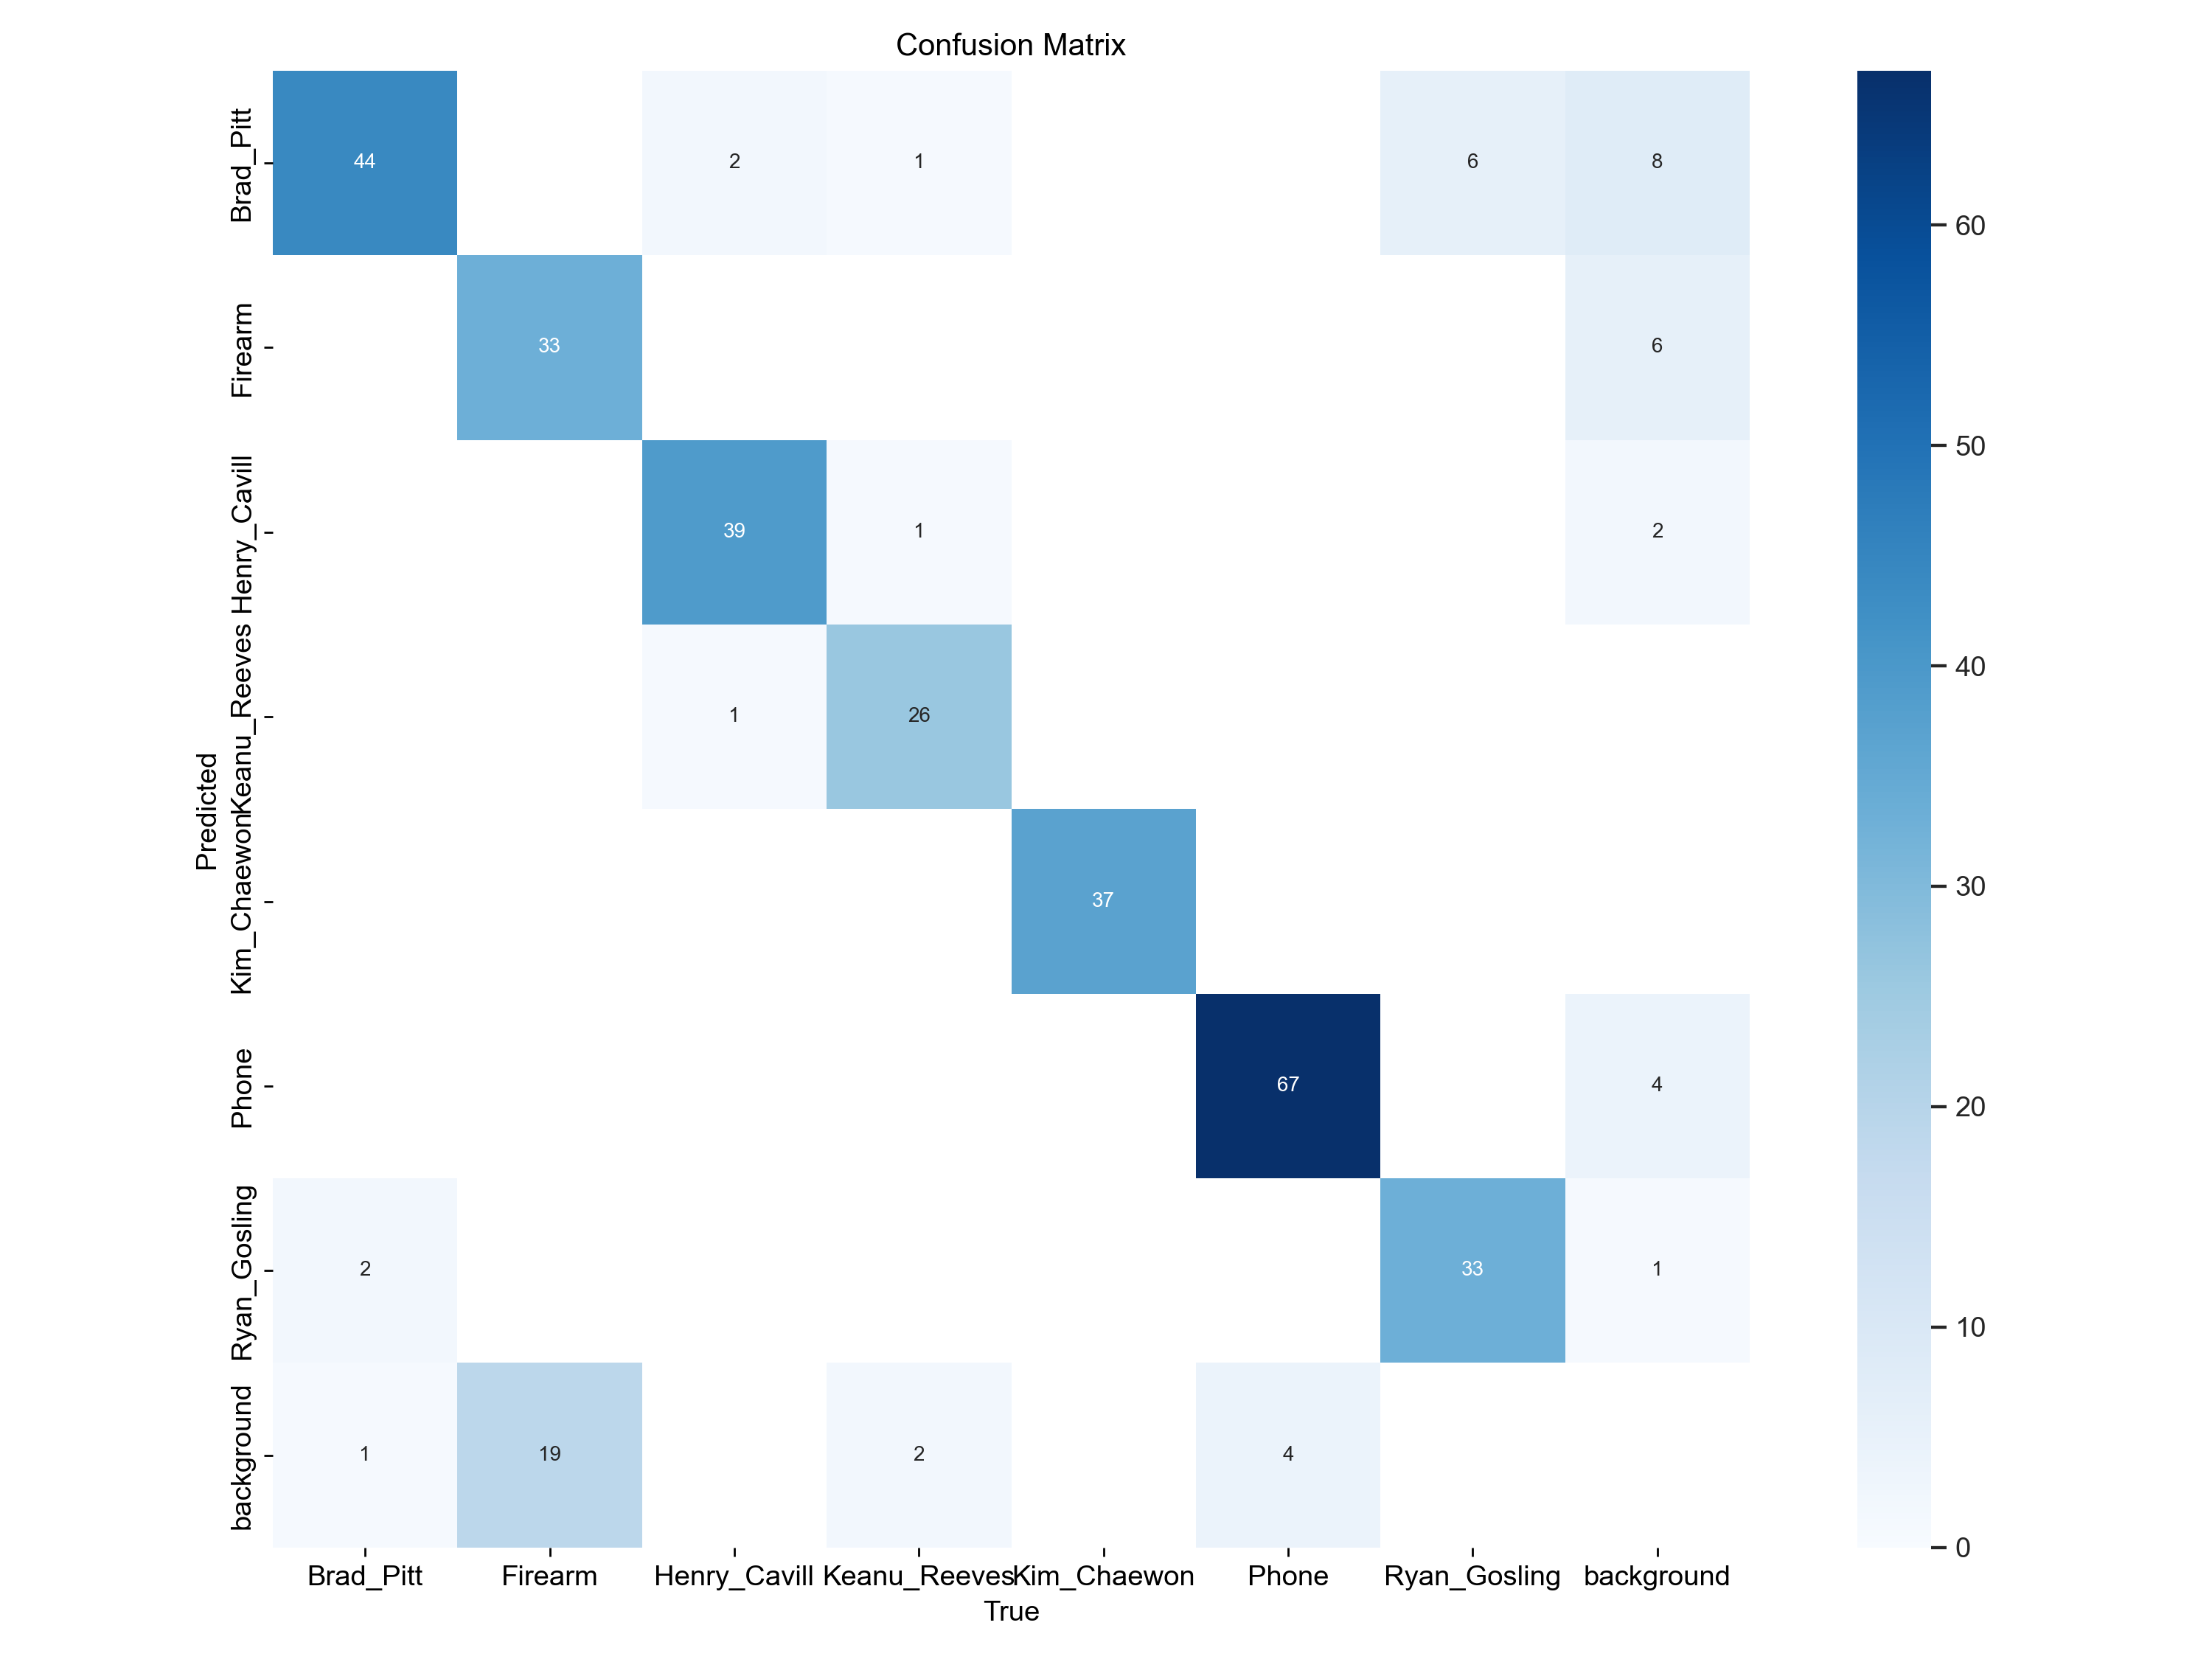

In [13]:
Image(filename=r"weights/train18/confusion_matrix.png", width=600)

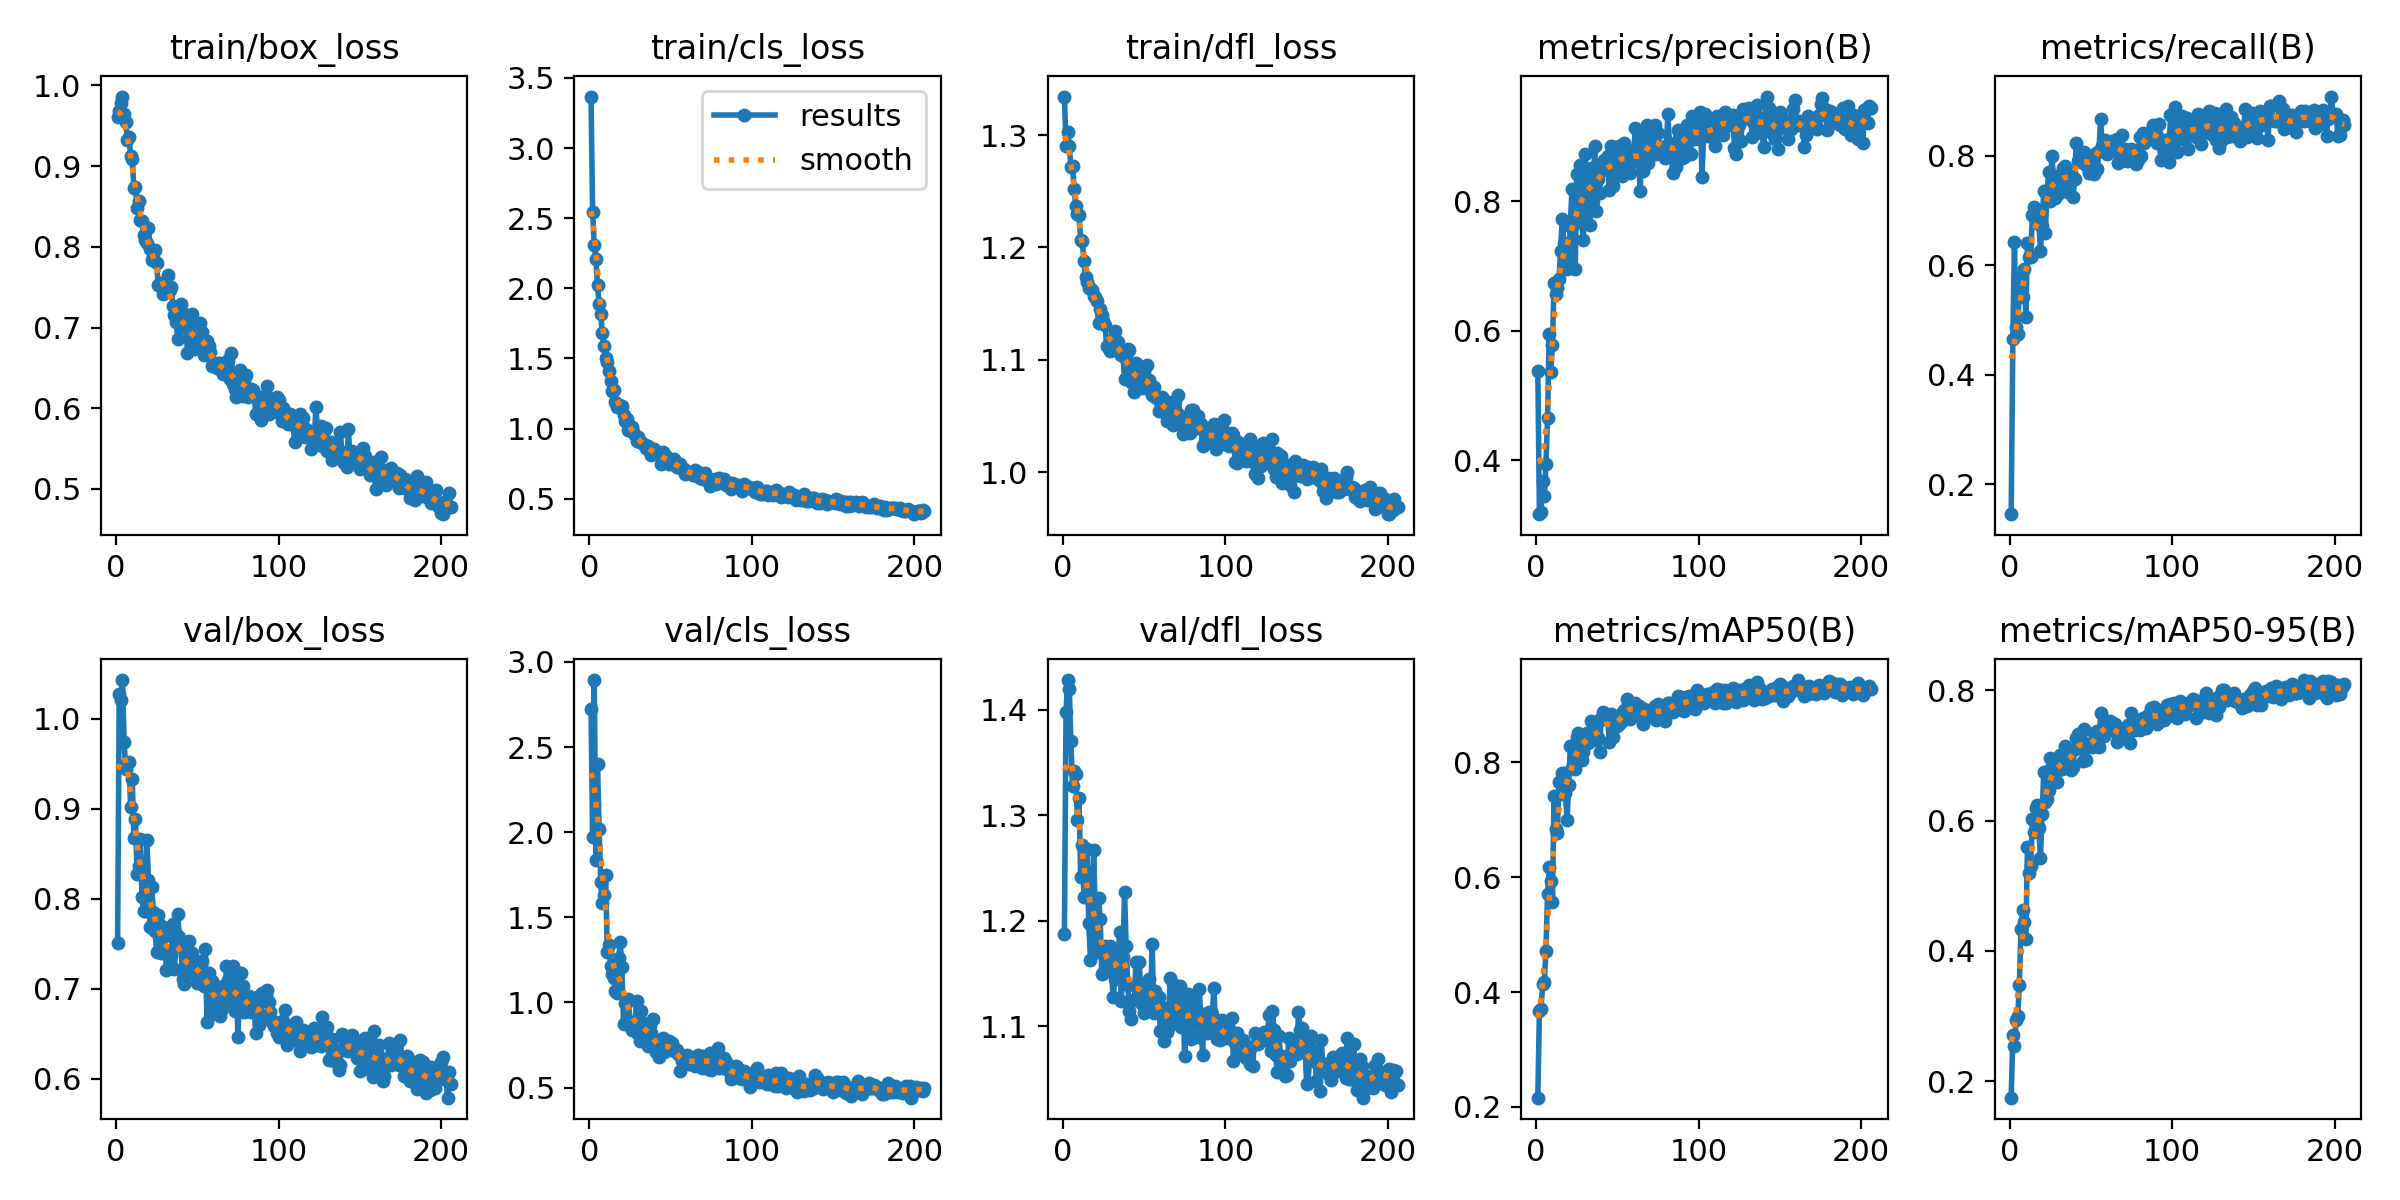

In [12]:
Image(filename=r"weights/train18/results.png", width=600)

In [15]:
model = YOLO(r"weights/train18/weights/best.pt")
model.predict(source=r"videos/full/Antifragile.mp4", save=True, imgsz=640, conf=0.75, half=True ,device="0", show=True)

WARNING  Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs
video 1/1 (frame 1/4672) C:\Users\Joshua

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Brad_Pitt', 1: 'Firearm', 2: 'Henry_Cavill', 3: 'Keanu_Reeves', 4: 'Kim_Chaewon', 5: 'Phone', 6: 'Ryan_Gosling'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [4]:
torch.cuda.is_available()

True

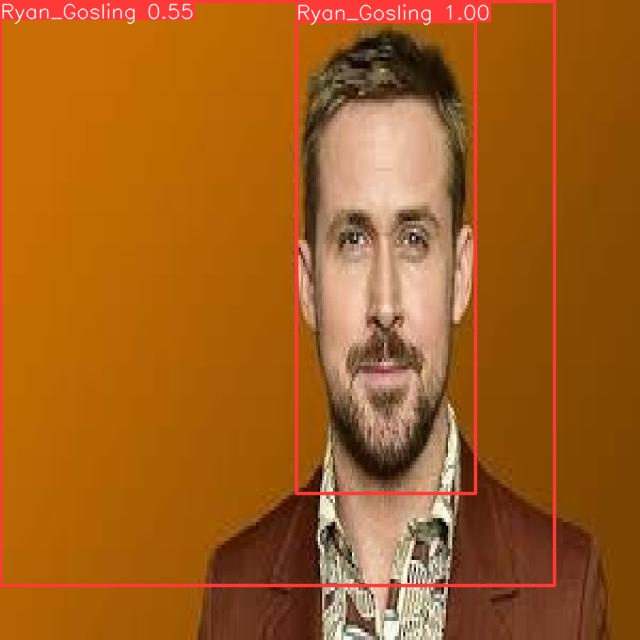

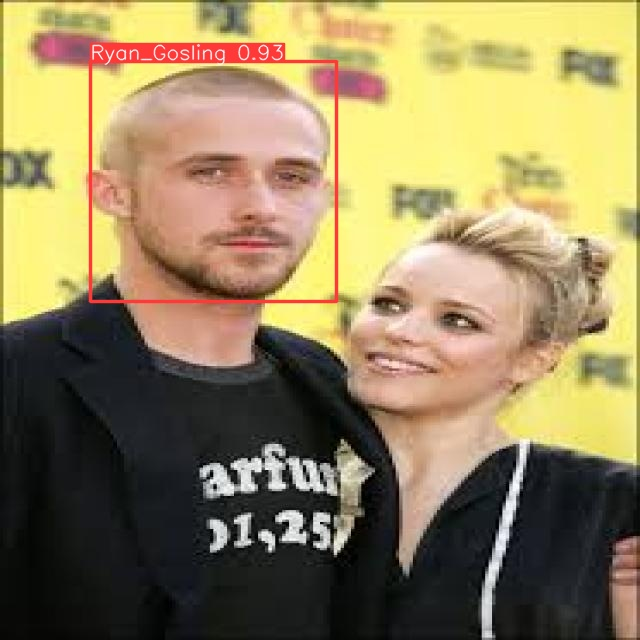

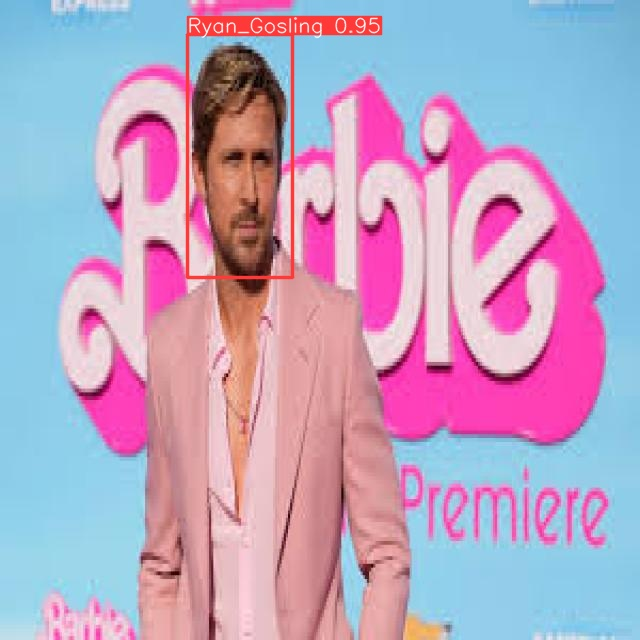

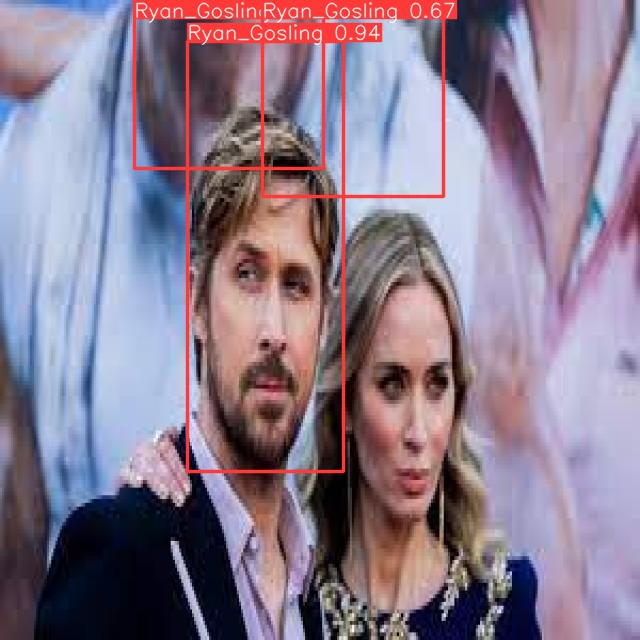

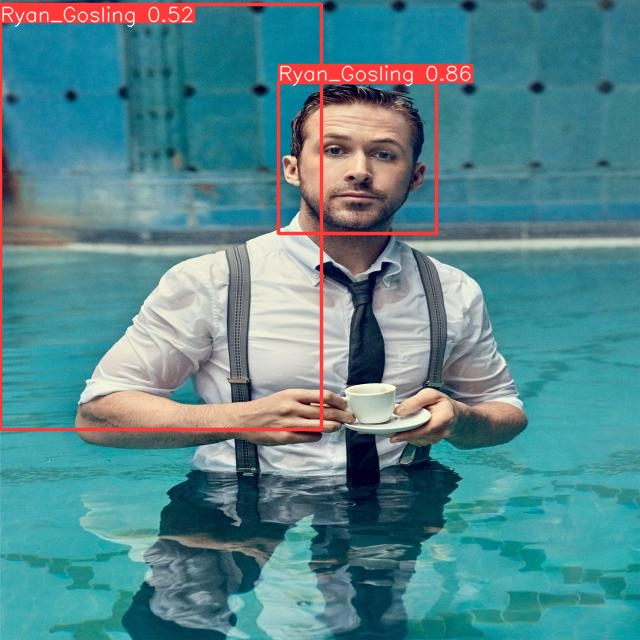

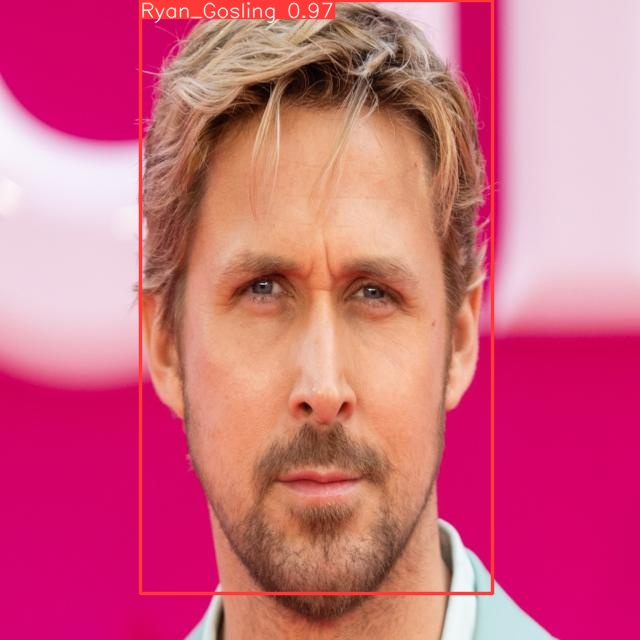

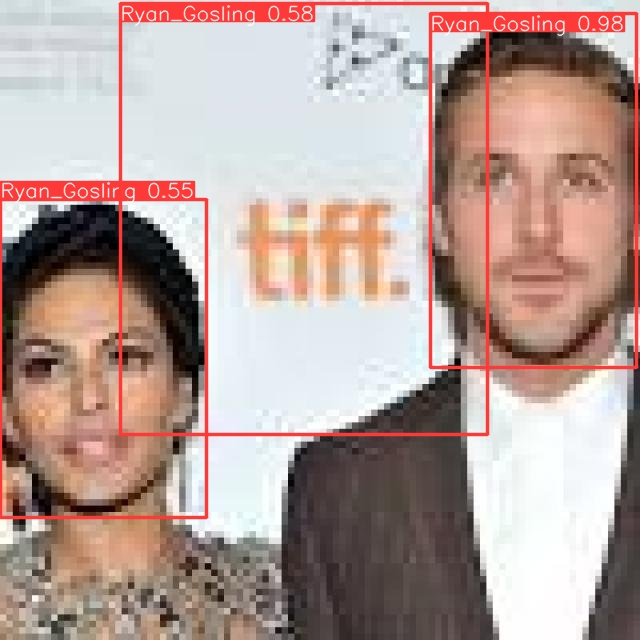

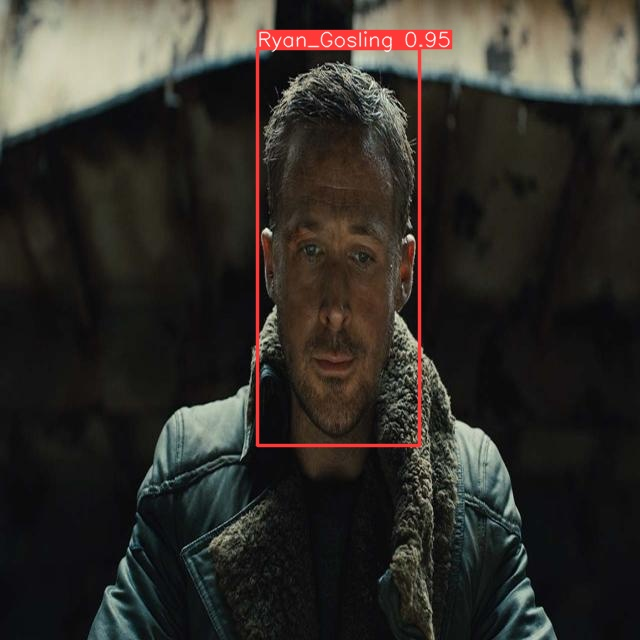

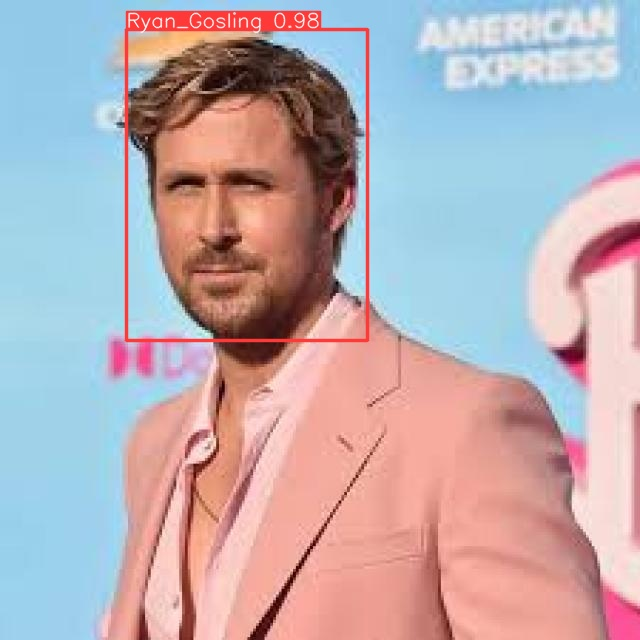

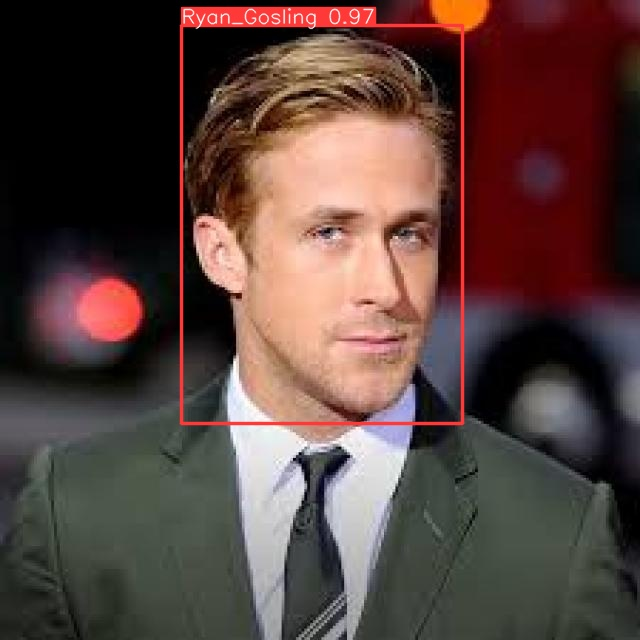

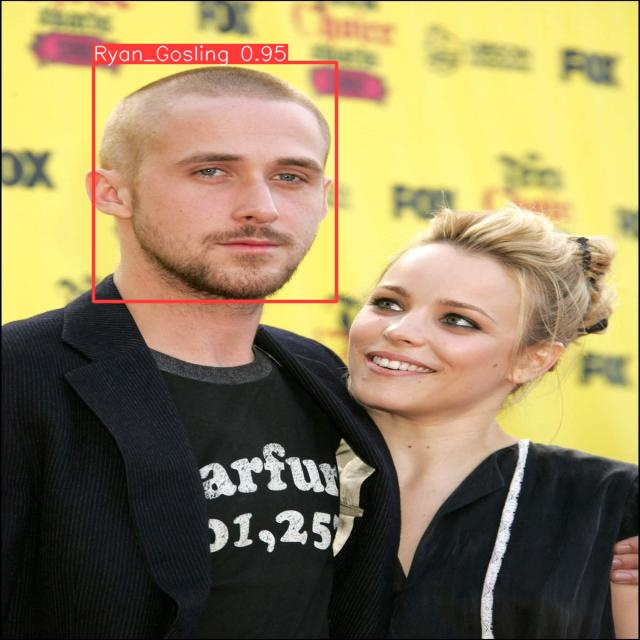

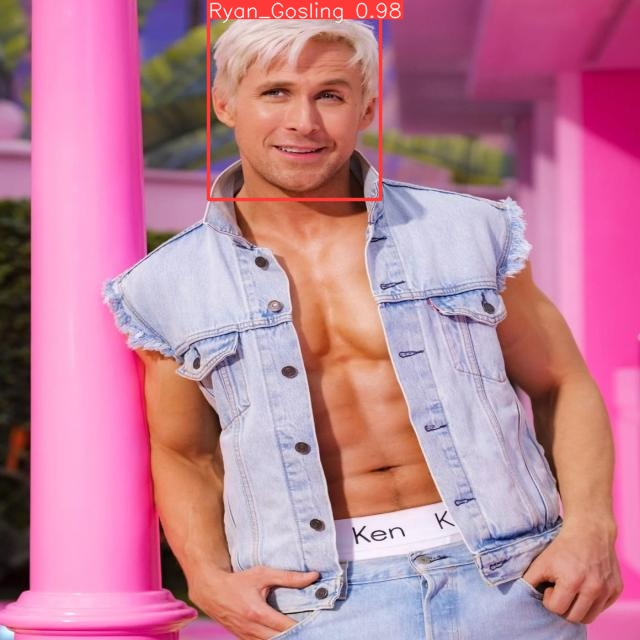

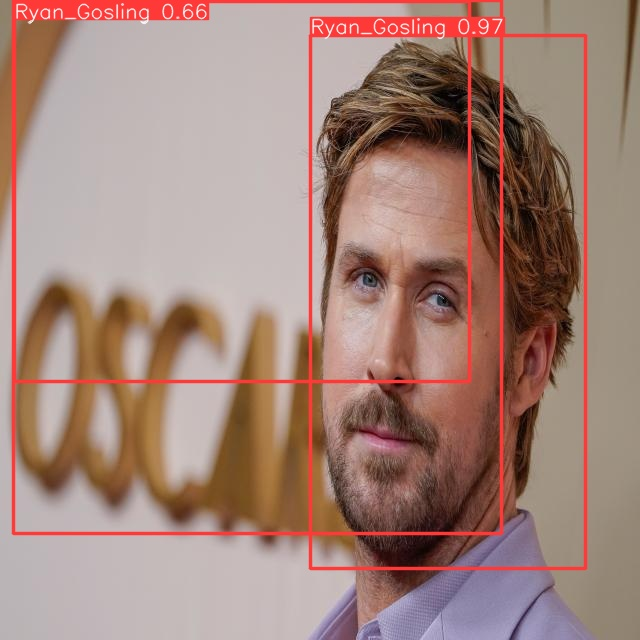

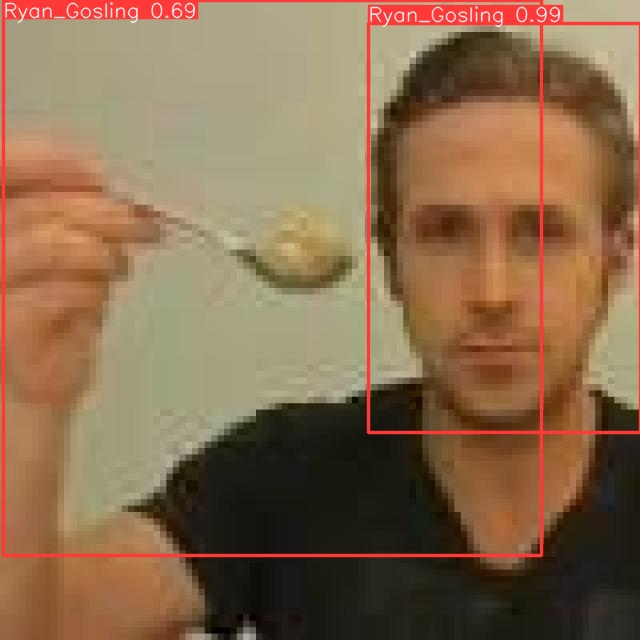

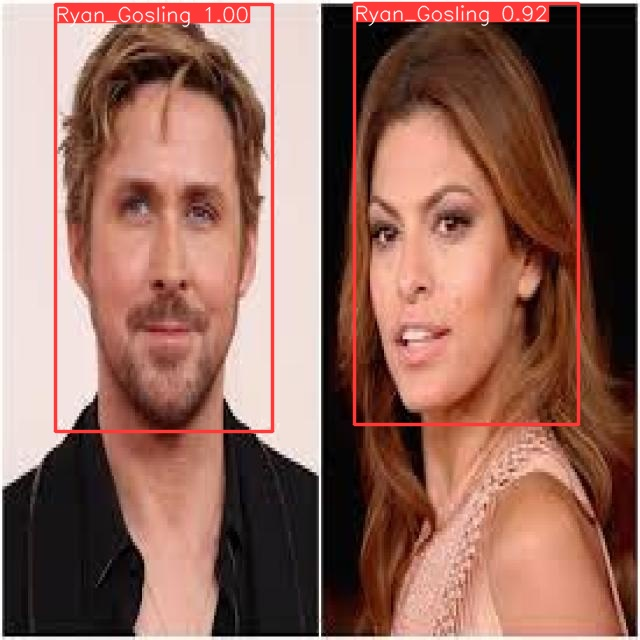

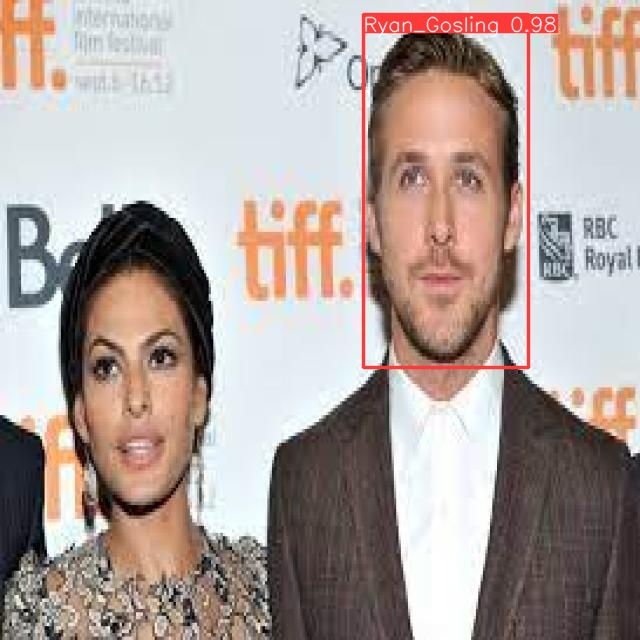

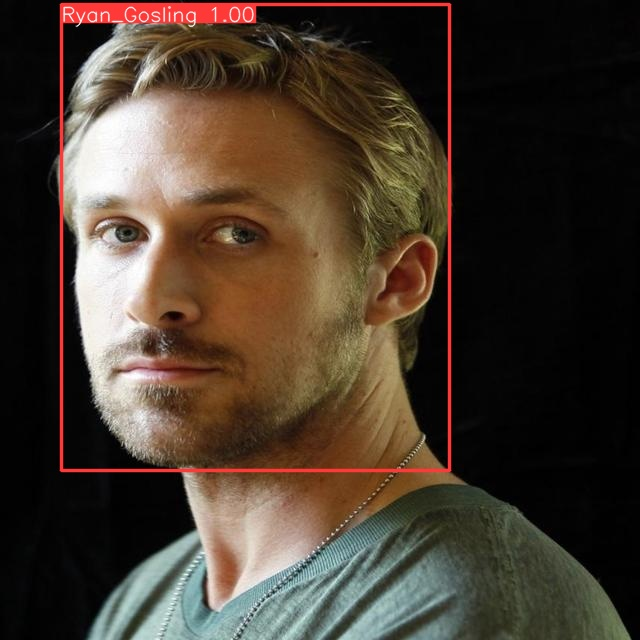

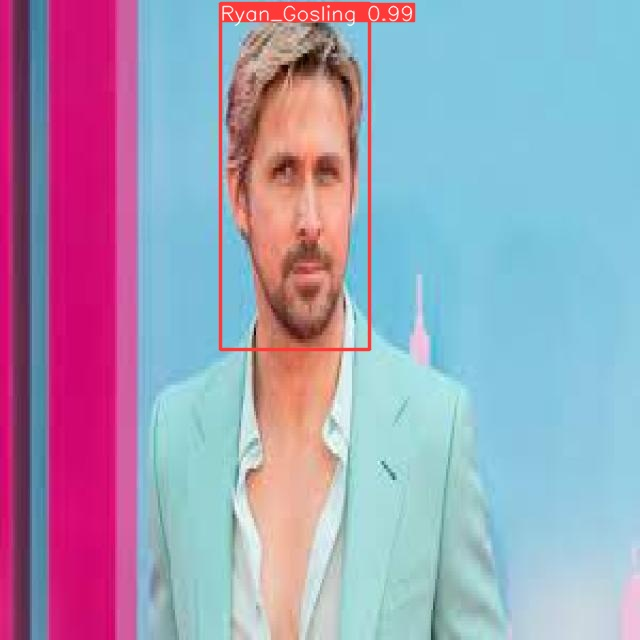

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict6/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:
print(f'{dataset.location}/data.yaml')
print('/content/OS_Detection_Model_Project-1/data.yaml')

/content/OS_Detection_Model_Project-1/data.yaml
/content/OS_Detection_Model_Project-1/data.yaml
